# Data Analysis (part of DE_LDS and PSD_LDS)

1. **Data Loading and Label Association**:
   - Loads EEG feature data (DE_LDS and PSD_LDS) from a specified `.mat` file.
   - Uses a predefined `session1_label` list to associate each trial with an emotion label (0, 1, 2, 3 corresponding to neutral, sad, fear, happy).
   - Filters the loaded data keys to identify the relevant DE_LDS and PSD_LDS entries.
   - Groups and concatenates all DE_LDS and PSD_LDS data by their respective emotion labels, resulting in arrays that represent all trials for each emotion.

2. **Data Inspection**:
   - Prints the shapes of the concatenated DE_LDS and PSD_LDS arrays for each emotion label.
   - Interprets the dimensions of the data (e.g., number of channels, total time windows, frequency bands) based on the array shapes.



In [7]:
# Step 1: Load, Concatenate, and Inspect Data by Labels
import scipy.io as sio
import numpy as np

# Define the file path to the specific .mat file
file_path = 'D:/BigData/SEED_IV/SEED_IV/eeg_feature_smooth/1/1_20160518.mat'


# Load the .mat file
mat_data = sio.loadmat(file_path)

# Define session labels for emotions
session1_label = [1, 2, 3, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 3, 2, 2, 3, 3, 0, 3, 0, 3]
#The labels with 0, 1, 2, and 3 denote the ground truth, neutral, sad, fear, and happy emotions, respectively.

# Filter keys to include only relevant ones (those that match the number of session labels)
relevant_keys = [key for key in mat_data.keys() if ('de_LDS' in key or 'psd_LDS' in key) and not key.startswith('__')]

# Initialize dictionaries to store data by emotion label
de_lds_by_label = {0: [], 1: [], 2: [], 3: []}
psd_lds_by_label = {0: [], 1: [], 2: [], 3: []}

# Concatenate data based on label
for idx, key in enumerate(relevant_keys):
    if idx < len(session1_label):
        label = session1_label[idx]
        if 'de_LDS' in key:
            de_lds_by_label[label].append(mat_data[key])
        elif 'psd_LDS' in key:
            psd_lds_by_label[label].append(mat_data[key])

# Concatenate all de_LDS and psd_LDS data by emotion label
concatenated_de_lds_by_label = {label: np.concatenate(data_list, axis=1) for label, data_list in de_lds_by_label.items() if len(data_list) > 0}
concatenated_psd_lds_by_label = {label: np.concatenate(data_list, axis=1) for label, data_list in psd_lds_by_label.items() if len(data_list) > 0}

# Print the shapes of the concatenated data for each emotion label
for label in concatenated_de_lds_by_label:
    print(f'Concatenated de_LDS for Emotion {label}: Shape: {concatenated_de_lds_by_label[label].shape}')
for label in concatenated_psd_lds_by_label:
    print(f'Concatenated psd_LDS for Emotion {label}: Shape: {concatenated_psd_lds_by_label[label].shape}')

# Document shapes and variability of concatenated data by label
for label in concatenated_de_lds_by_label:
    data = concatenated_de_lds_by_label[label]
    print(f'de_LDS Emotion {label}: Channels: {data.shape[0]}, Total Time Windows: {data.shape[1]}, Frequency Bands: {data.shape[2]}')
for label in concatenated_psd_lds_by_label:
    data = concatenated_psd_lds_by_label[label]
    print(f'psd_LDS Emotion {label}: Channels: {data.shape[0]}, Total Time Windows: {data.shape[1]}, Frequency Bands: {data.shape[2]}')

Concatenated de_LDS for Emotion 0: Shape: (62, 93, 5)
Concatenated de_LDS for Emotion 1: Shape: (62, 80, 5)
Concatenated de_LDS for Emotion 2: Shape: (62, 177, 5)
Concatenated de_LDS for Emotion 3: Shape: (62, 65, 5)
Concatenated psd_LDS for Emotion 0: Shape: (62, 72, 5)
Concatenated psd_LDS for Emotion 1: Shape: (62, 132, 5)
Concatenated psd_LDS for Emotion 2: Shape: (62, 78, 5)
Concatenated psd_LDS for Emotion 3: Shape: (62, 133, 5)
de_LDS Emotion 0: Channels: 62, Total Time Windows: 93, Frequency Bands: 5
de_LDS Emotion 1: Channels: 62, Total Time Windows: 80, Frequency Bands: 5
de_LDS Emotion 2: Channels: 62, Total Time Windows: 177, Frequency Bands: 5
de_LDS Emotion 3: Channels: 62, Total Time Windows: 65, Frequency Bands: 5
psd_LDS Emotion 0: Channels: 62, Total Time Windows: 72, Frequency Bands: 5
psd_LDS Emotion 1: Channels: 62, Total Time Windows: 132, Frequency Bands: 5
psd_LDS Emotion 2: Channels: 62, Total Time Windows: 78, Frequency Bands: 5
psd_LDS Emotion 3: Channels: 62

3. **Statistical Analysis**:
   - Computes variance and standard deviation of the features across time windows for each emotion.
   - Uses boxplots to visualize the distribution of variance and standard deviation for each emotion and feature type (DE_LDS and PSD_LDS).
   - This step helps in understanding the variability and spread of the EEG features under different emotional states.

4. **Correlation Analysis**:
   - Flattens the data (combining channels and time windows) to focus on frequency bands.
   - Computes correlation matrices of frequency bands for each emotion.
   - Visualizes these correlations with heatmaps to identify how frequency bands relate to each other within an emotion category.

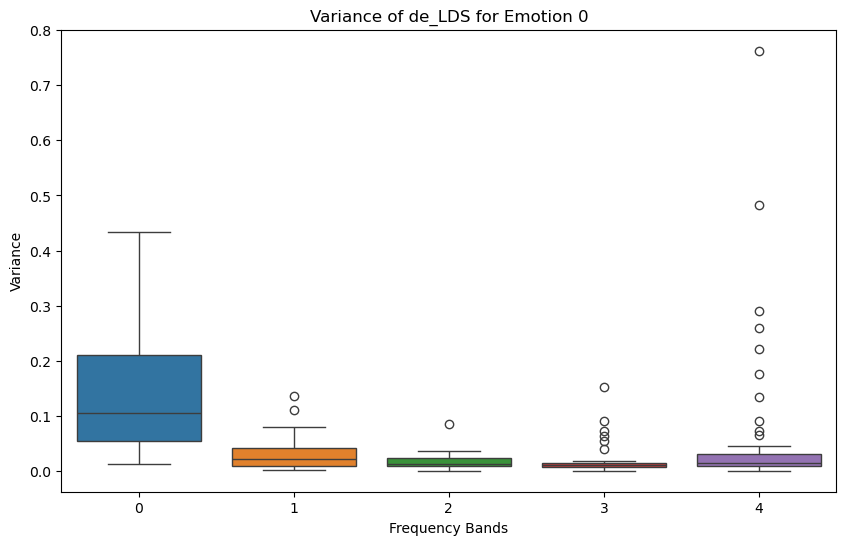

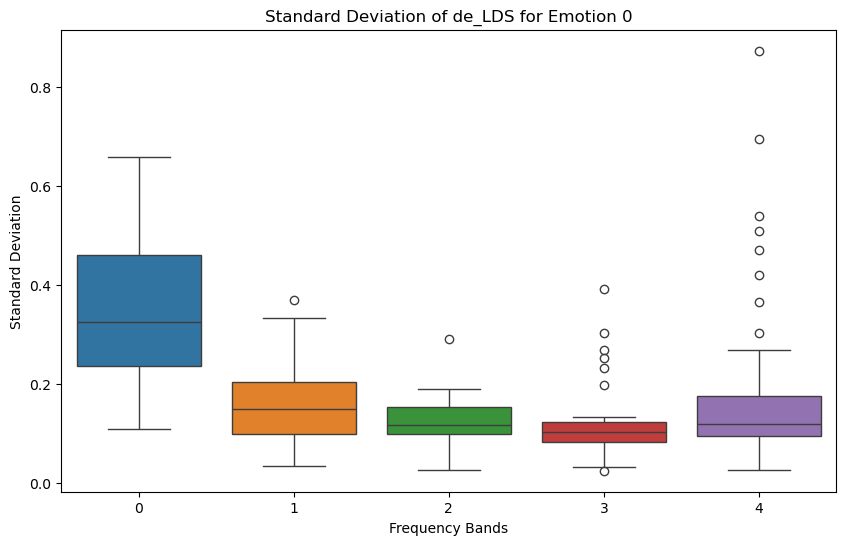

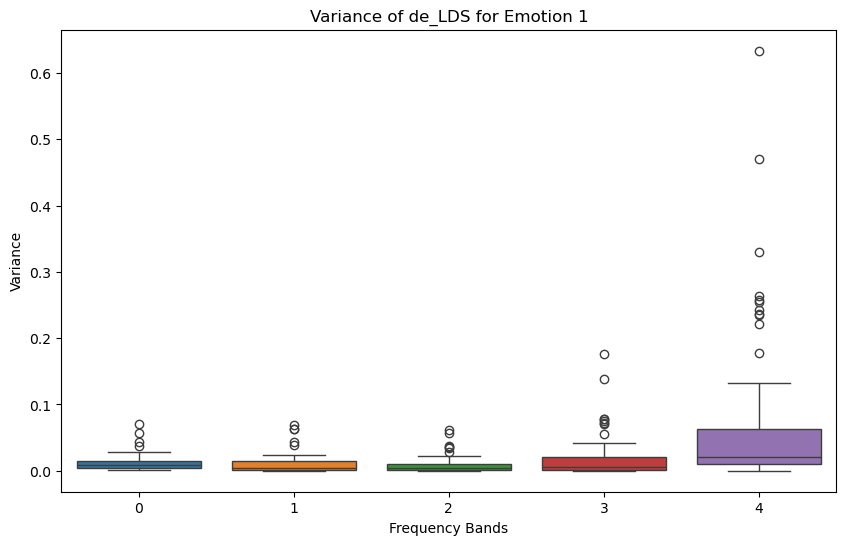

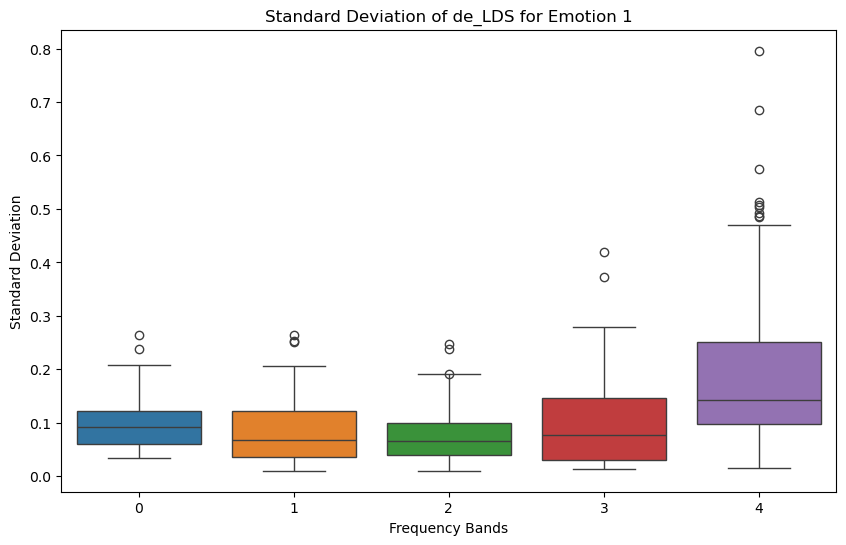

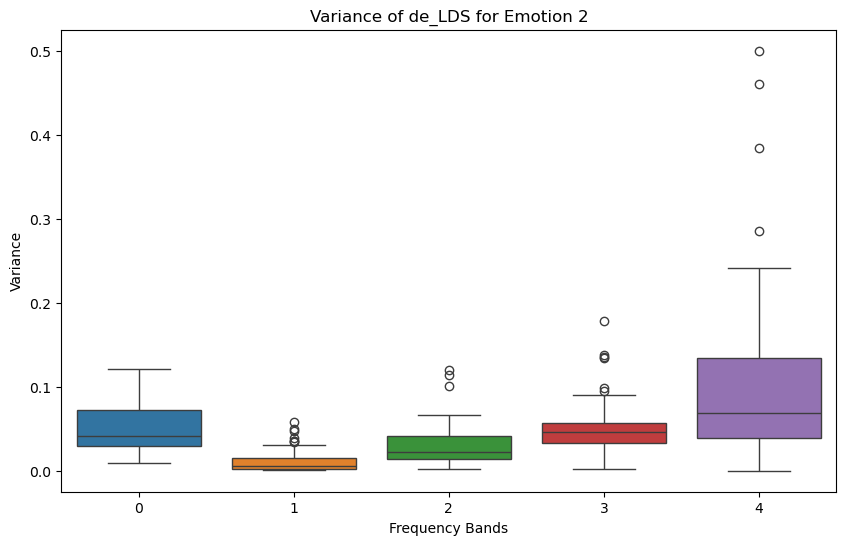

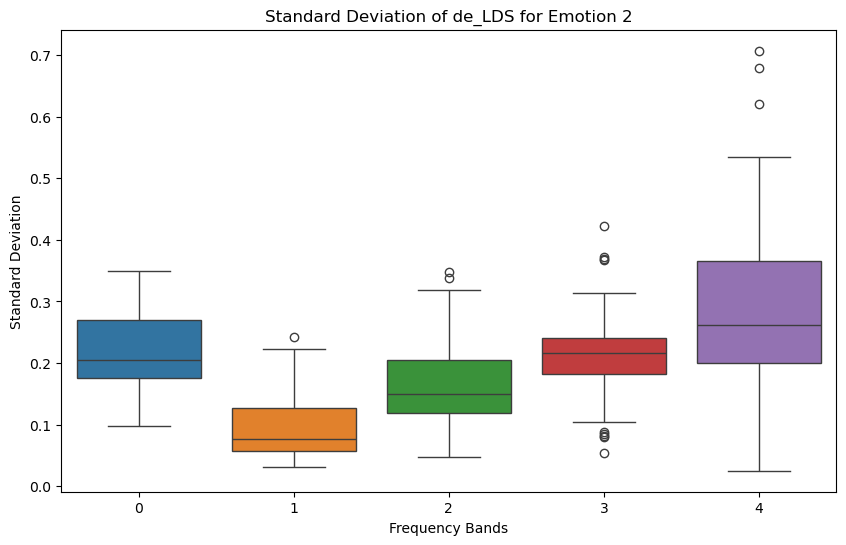

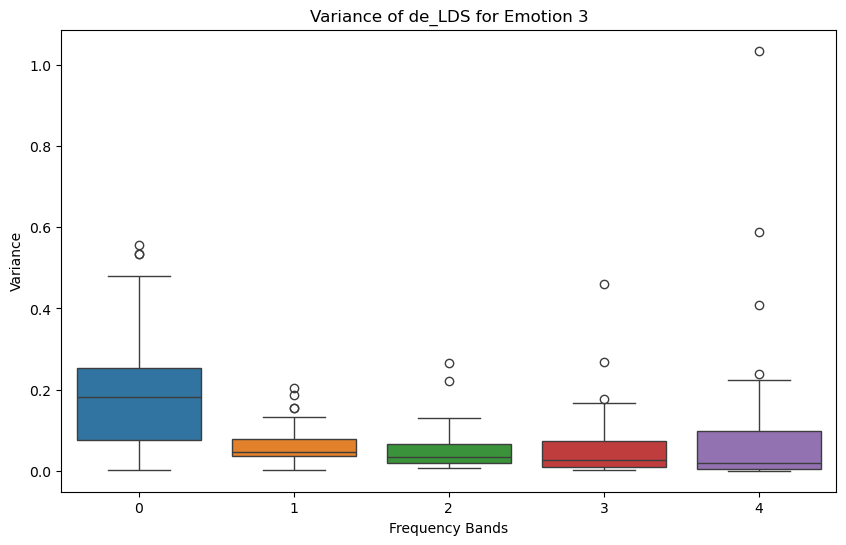

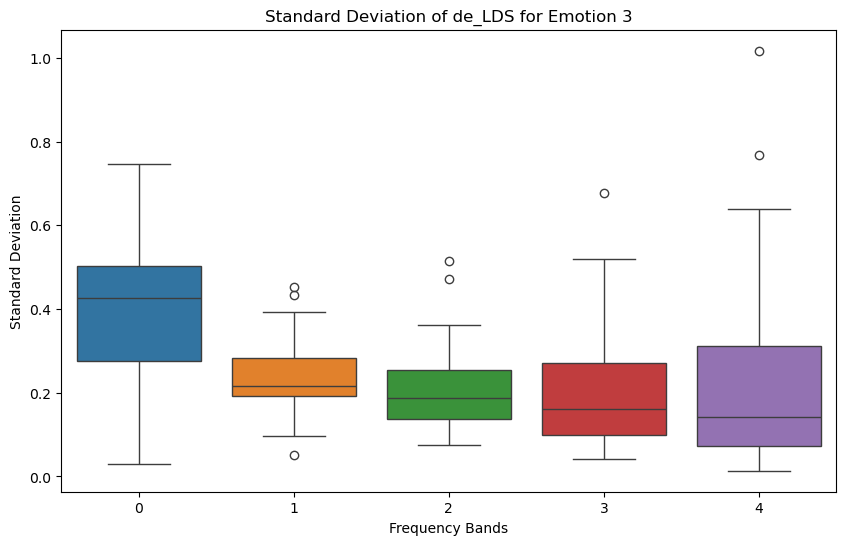

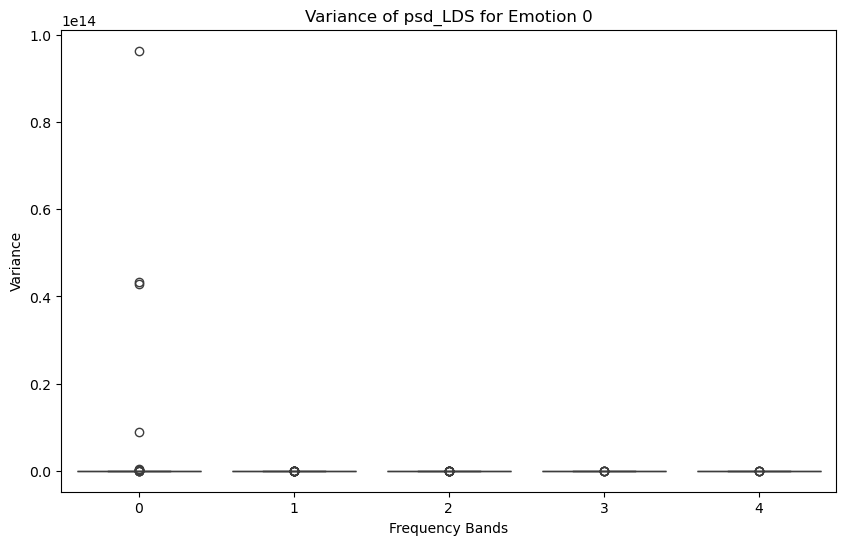

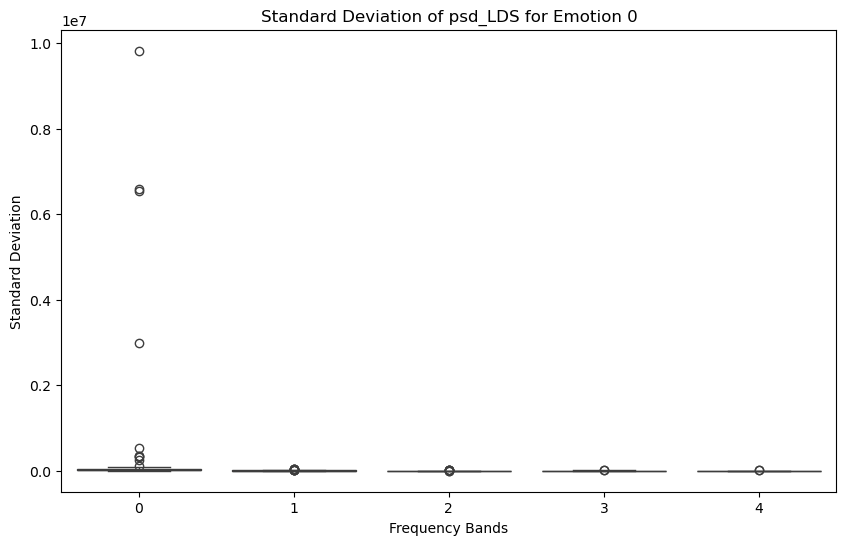

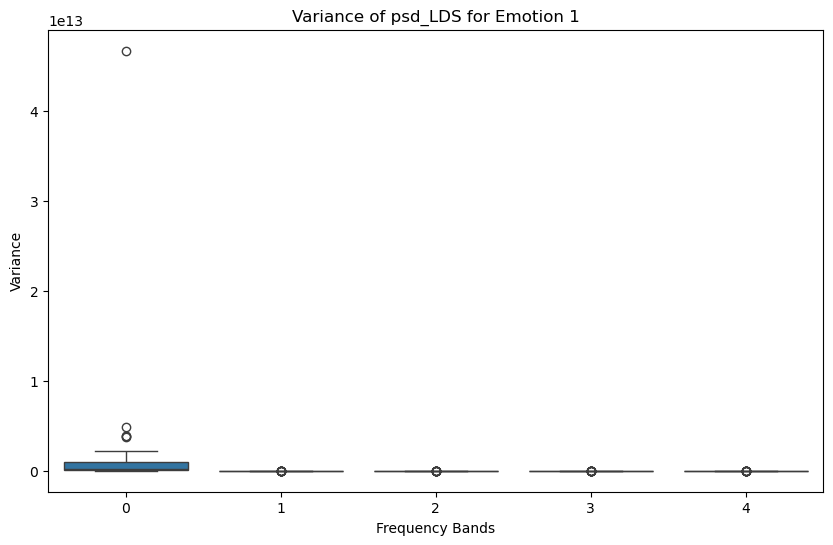

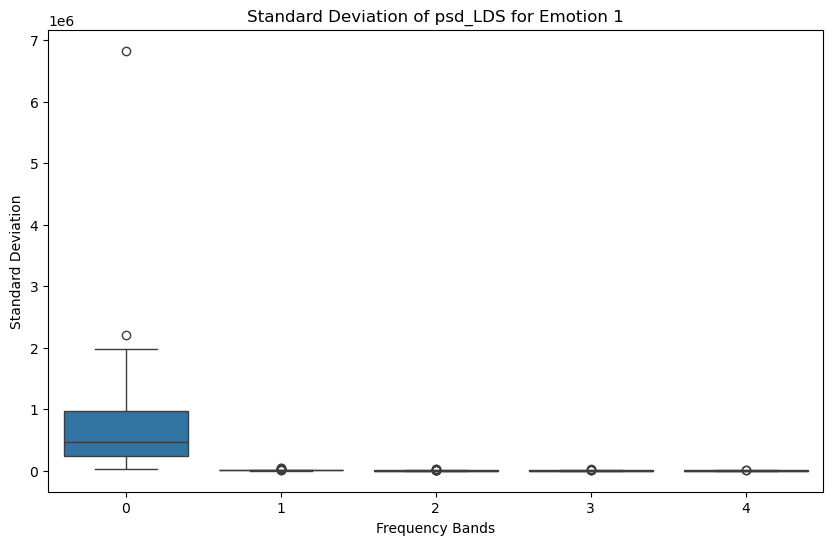

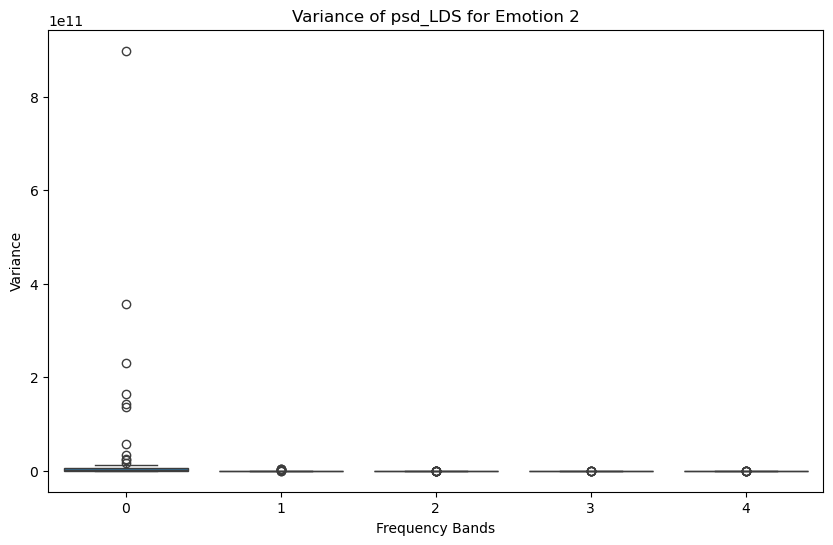

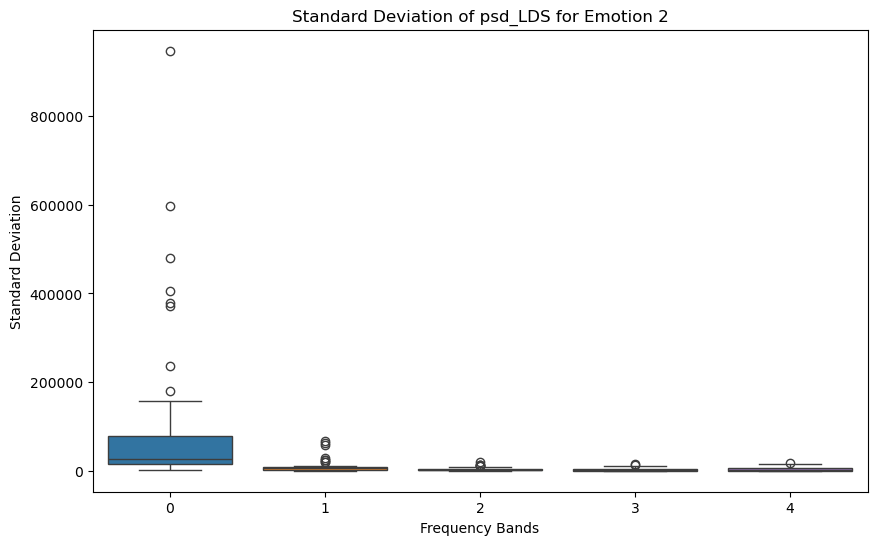

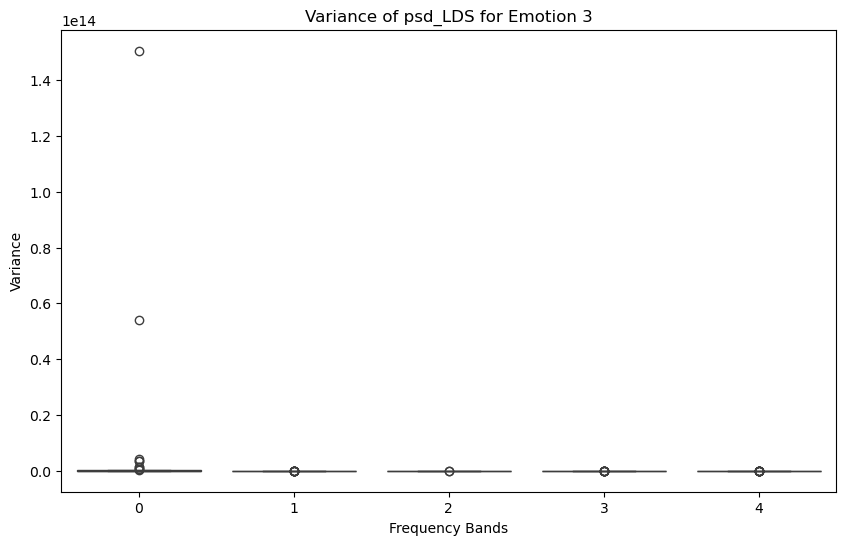

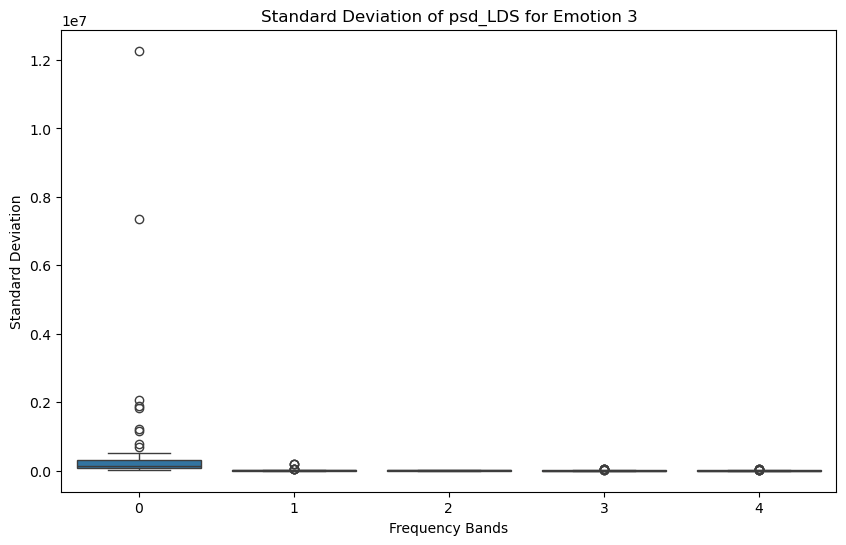

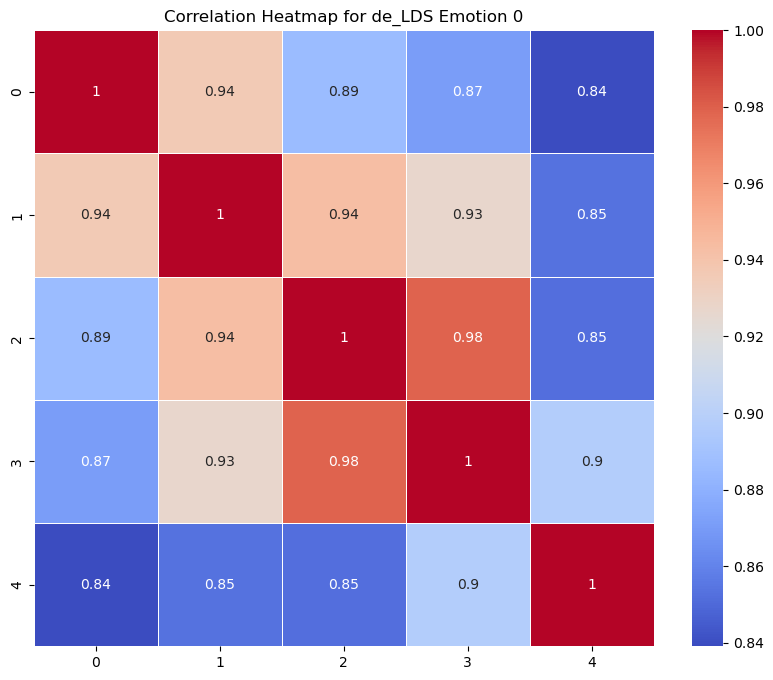

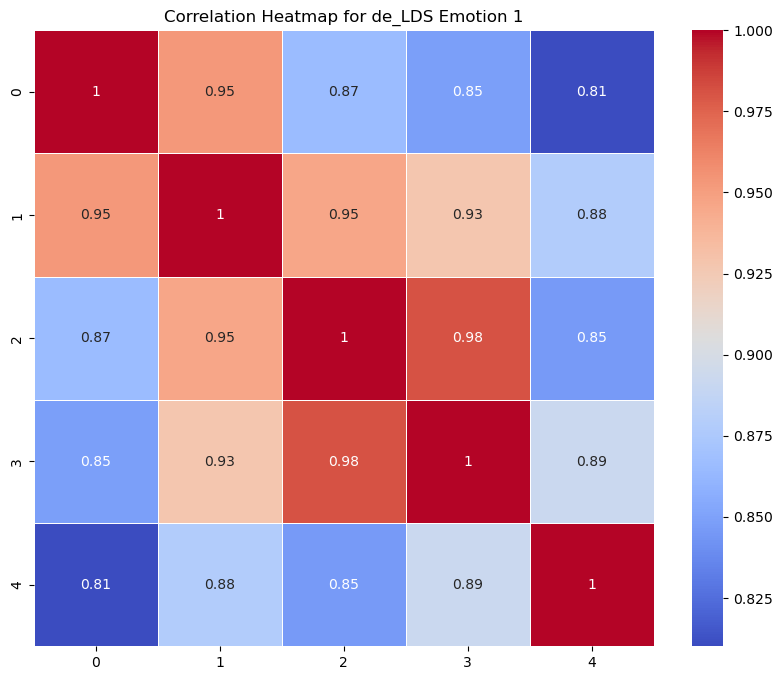

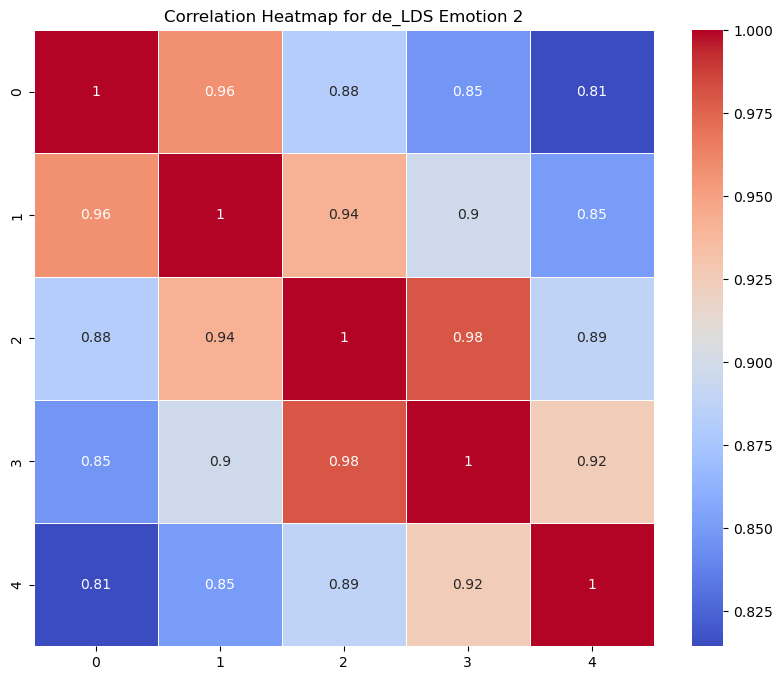

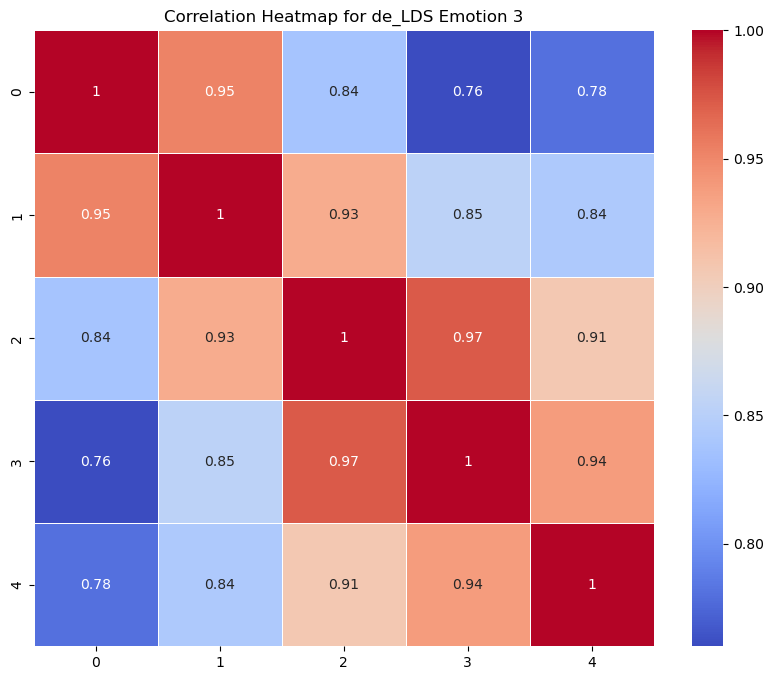

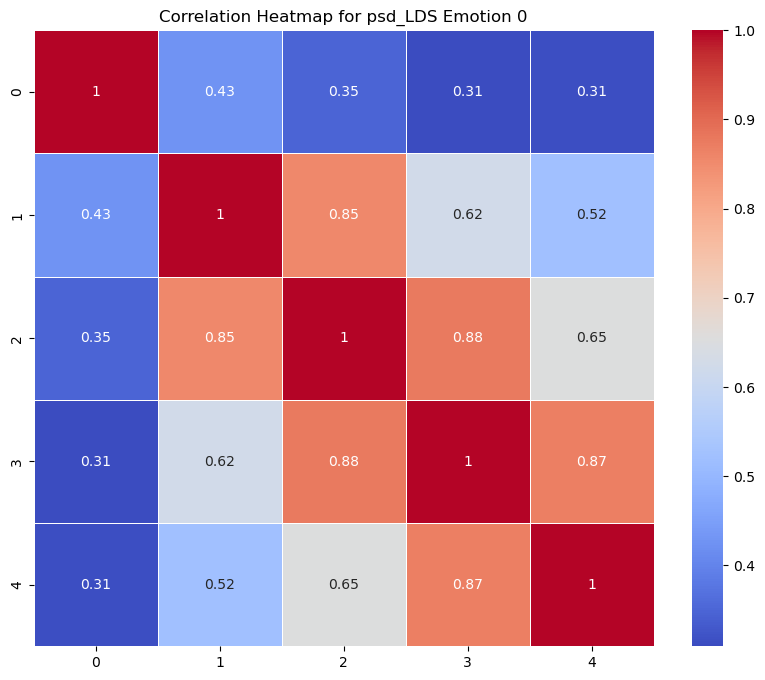

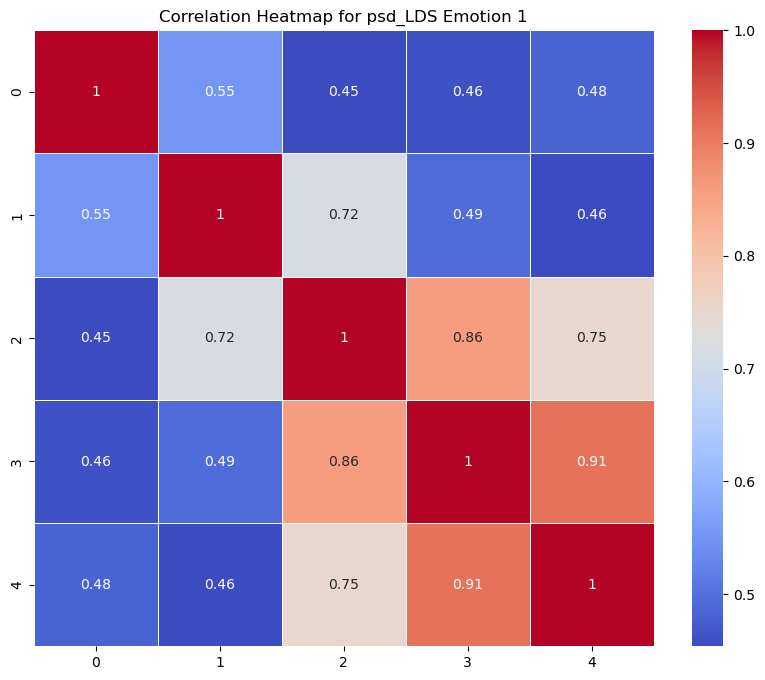

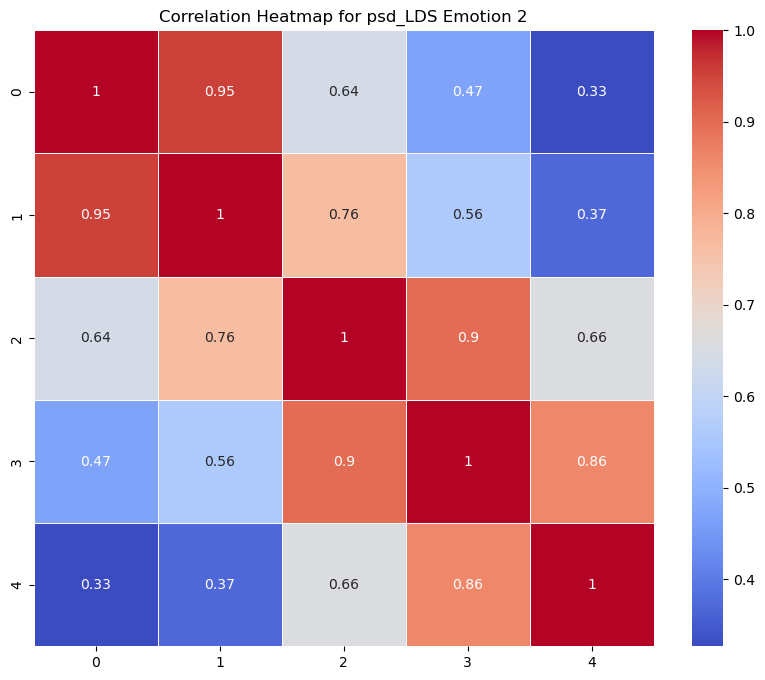

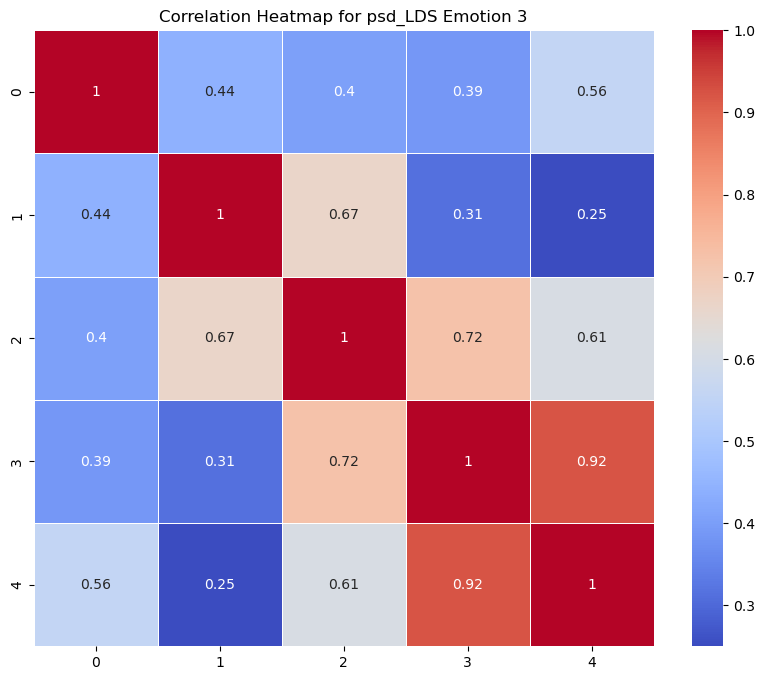

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1.1: Statistical Analysis and Visualization
# Variance and Standard Deviation Analysis for Each Emotion
for label in concatenated_de_lds_by_label:
    data = concatenated_de_lds_by_label[label]
    variance = np.var(data, axis=1)  # Variance across time windows
    std_dev = np.std(data, axis=1)  # Standard deviation across time windows

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=variance)
    plt.title(f'Variance of de_LDS for Emotion {label}')
    plt.xlabel('Frequency Bands')
    plt.ylabel('Variance')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=std_dev)
    plt.title(f'Standard Deviation of de_LDS for Emotion {label}')
    plt.xlabel('Frequency Bands')
    plt.ylabel('Standard Deviation')
    plt.show()

for label in concatenated_psd_lds_by_label:
    data = concatenated_psd_lds_by_label[label]
    variance = np.var(data, axis=1)  # Variance across time windows
    std_dev = np.std(data, axis=1)  # Standard deviation across time windows

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=variance)
    plt.title(f'Variance of psd_LDS for Emotion {label}')
    plt.xlabel('Frequency Bands')
    plt.ylabel('Variance')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=std_dev)
    plt.title(f'Standard Deviation of psd_LDS for Emotion {label}')
    plt.xlabel('Frequency Bands')
    plt.ylabel('Standard Deviation')
    plt.show()

# Step 1.2: Correlation Analysis for Each Emotion
for label in concatenated_de_lds_by_label:
    data = concatenated_de_lds_by_label[label].reshape(-1, concatenated_de_lds_by_label[label].shape[2])  # Flatten data across channels and time windows
    correlation_matrix = np.corrcoef(data, rowvar=False)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Heatmap for de_LDS Emotion {label}')
    plt.show()

for label in concatenated_psd_lds_by_label:
    data = concatenated_psd_lds_by_label[label].reshape(-1, concatenated_psd_lds_by_label[label].shape[2])  # Flatten data across channels and time windows
    correlation_matrix = np.corrcoef(data, rowvar=False)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Heatmap for psd_LDS Emotion {label}')
    plt.show()

5. **Dimensionality Reduction (PCA and t-SNE)**:
   - Applies Principal Component Analysis (PCA) to reduce the dimensionality of the flattened data, extracting the first two principal components.
   - Plots these components to see how data points cluster or separate by emotion in a lower-dimensional space.
   - Applies t-SNE, another dimensionality reduction method, to visualize complex patterns or clusters in 2D space.
   - These visualizations (scatter plots from PCA and t-SNE) help in exploring whether different emotional states form distinct groups or share similar feature distributions.

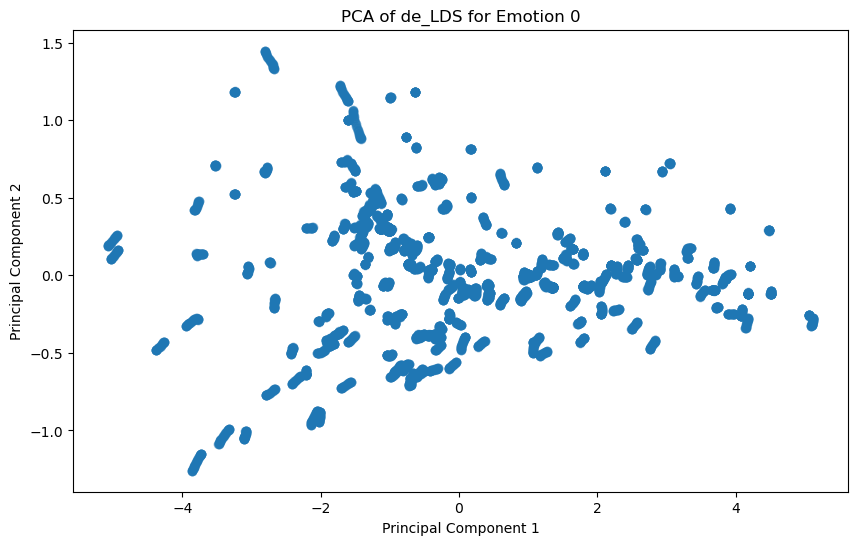

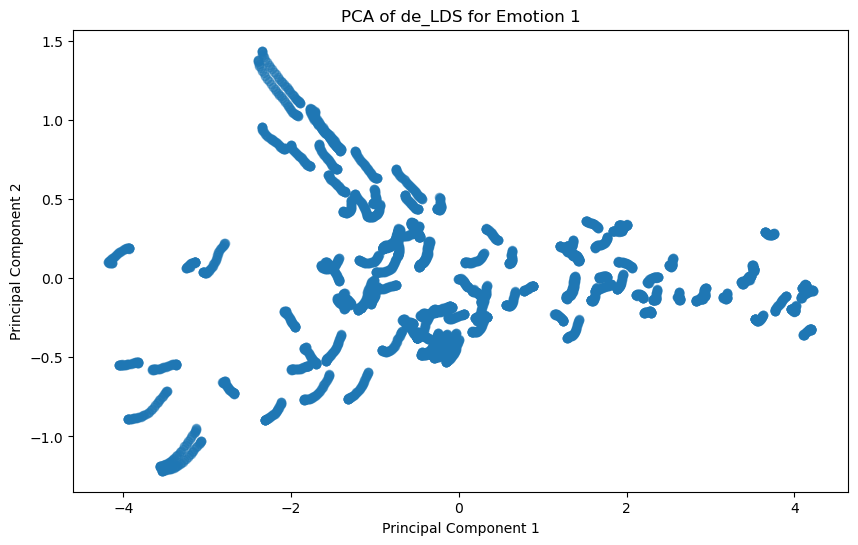

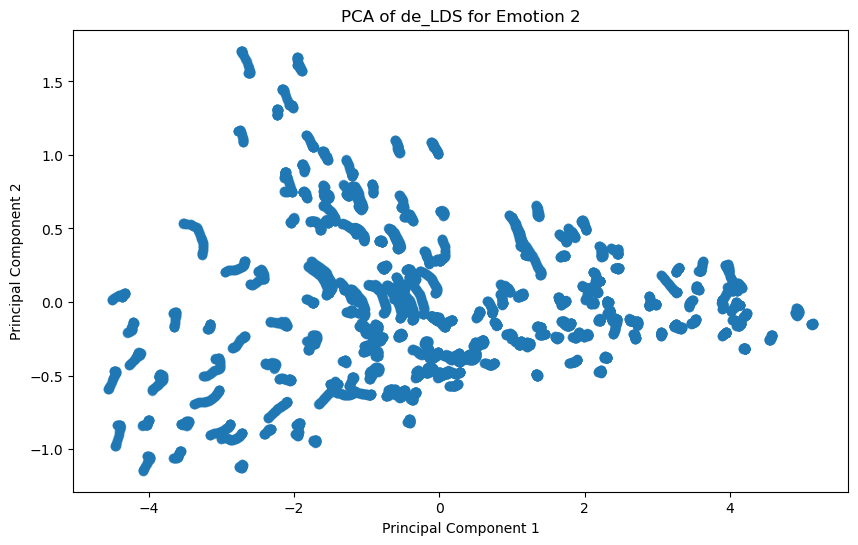

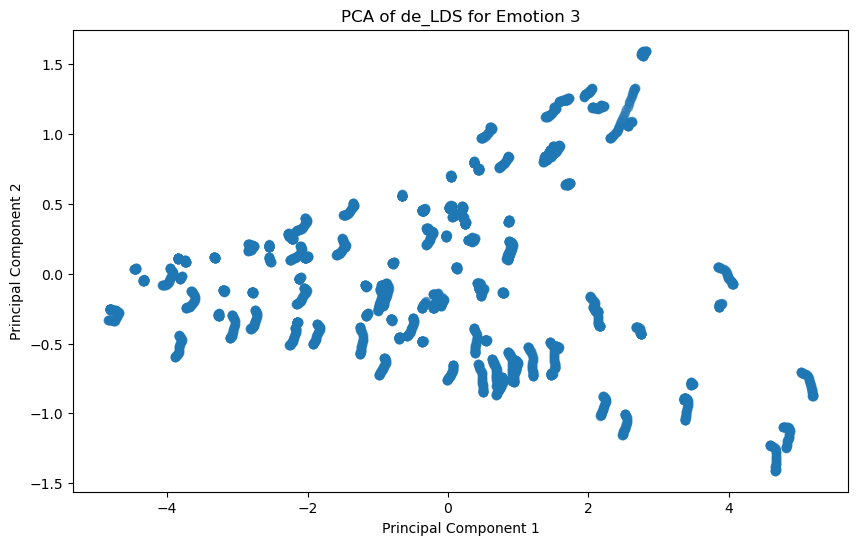

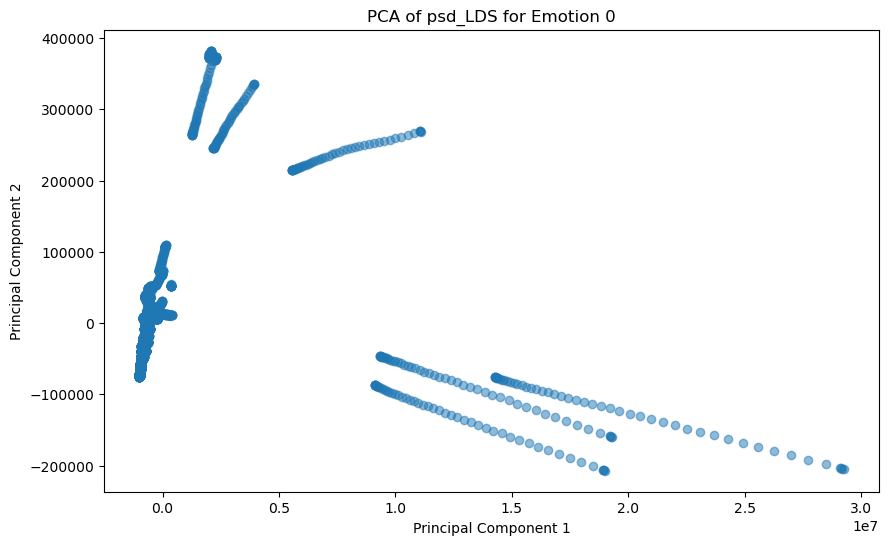

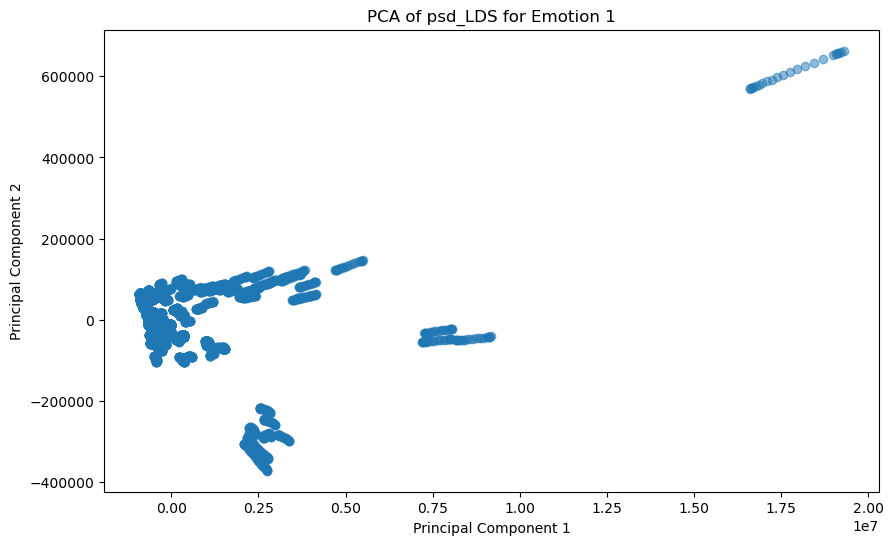

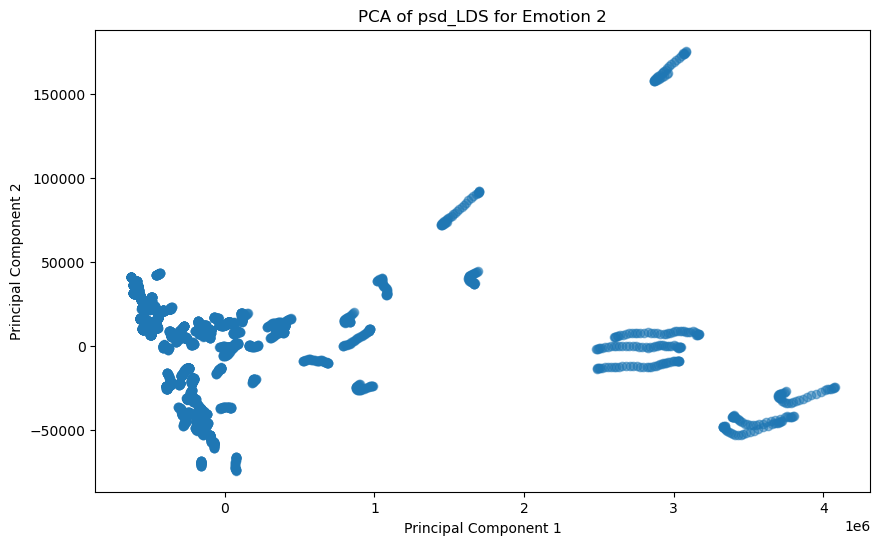

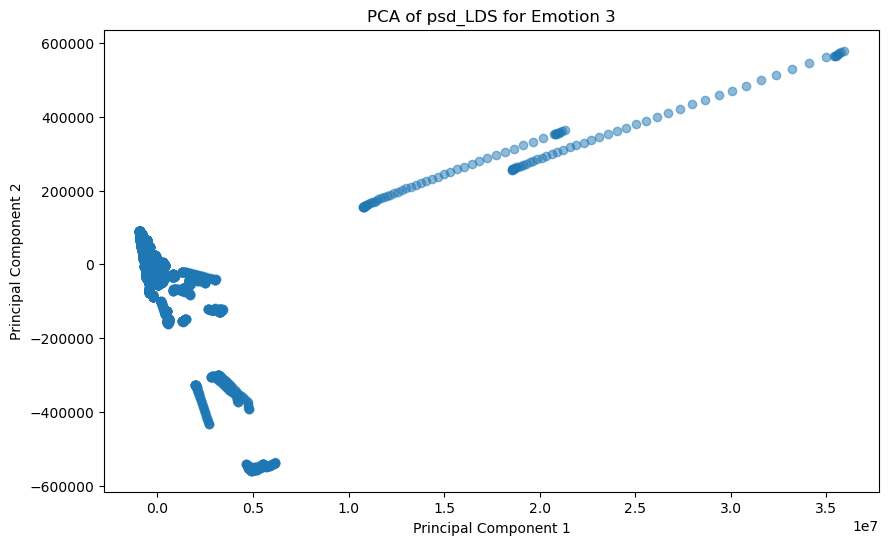

c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


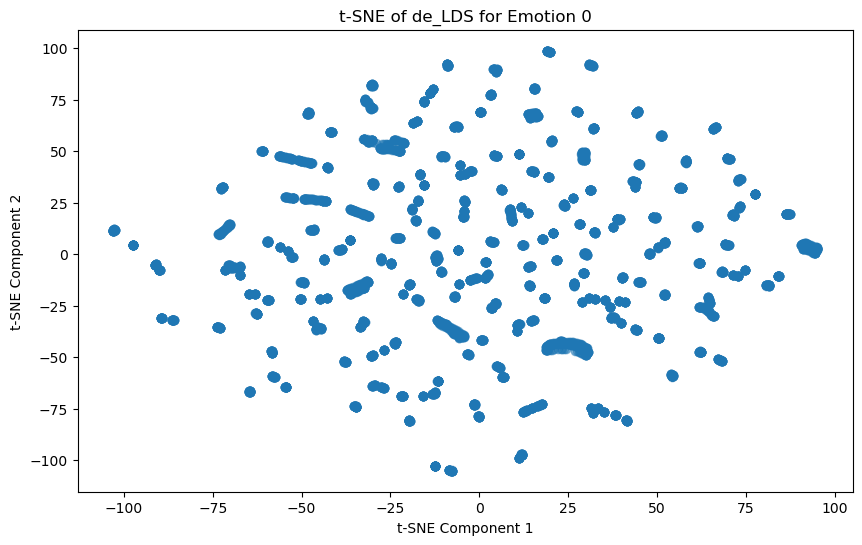

c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


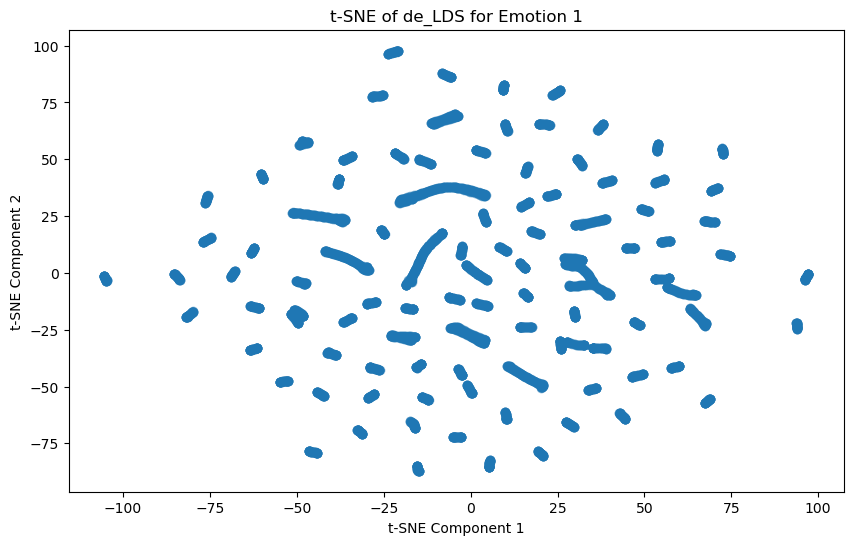

c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


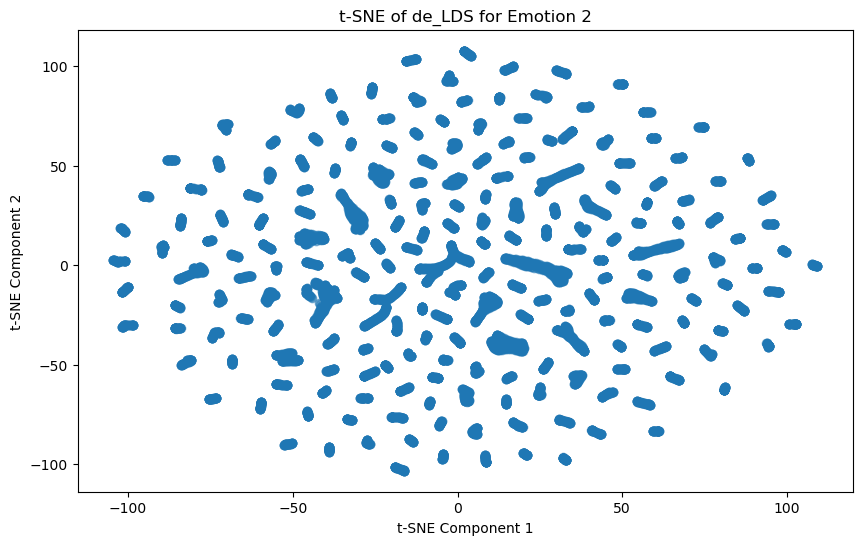

c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


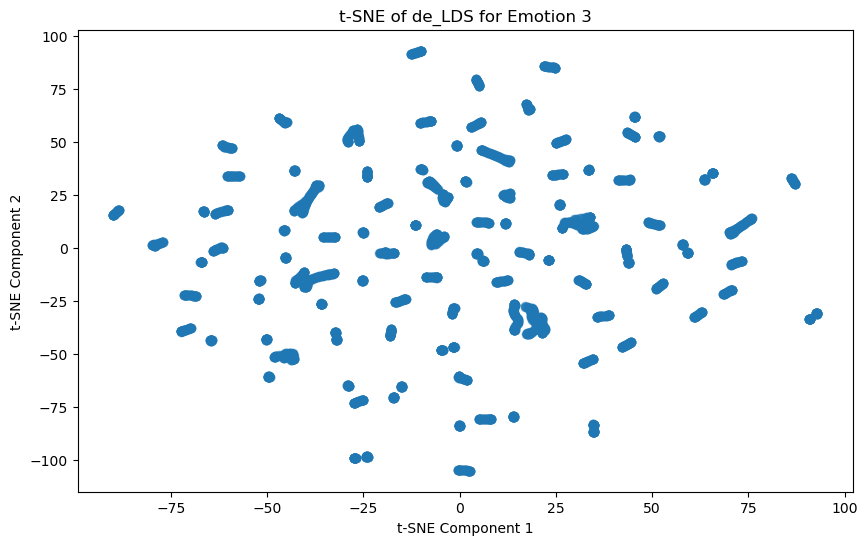

c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


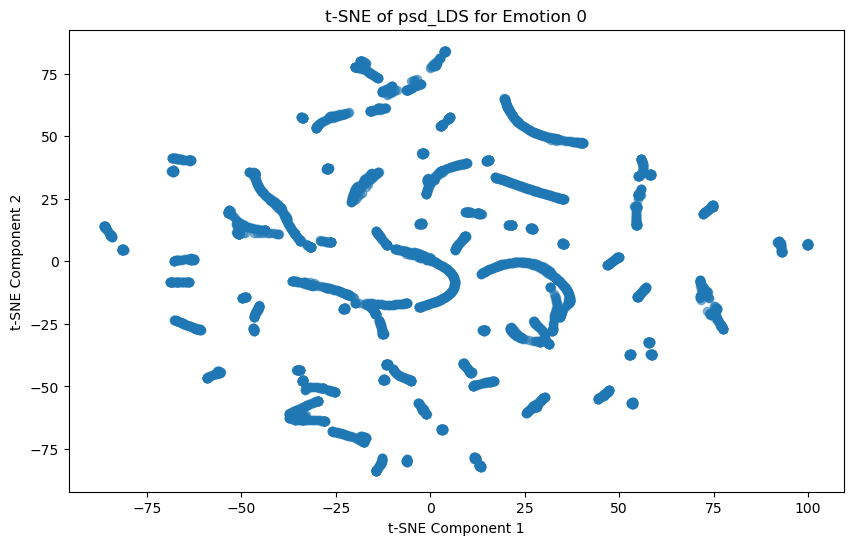

c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


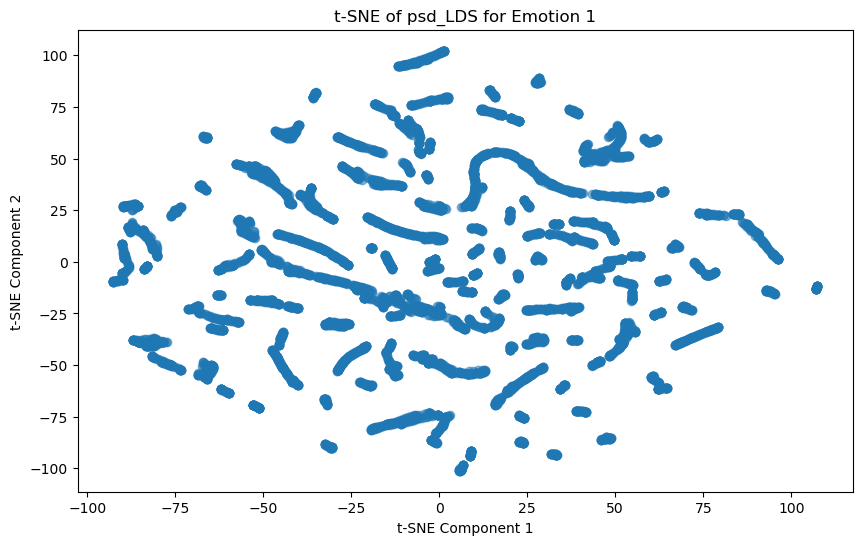

c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


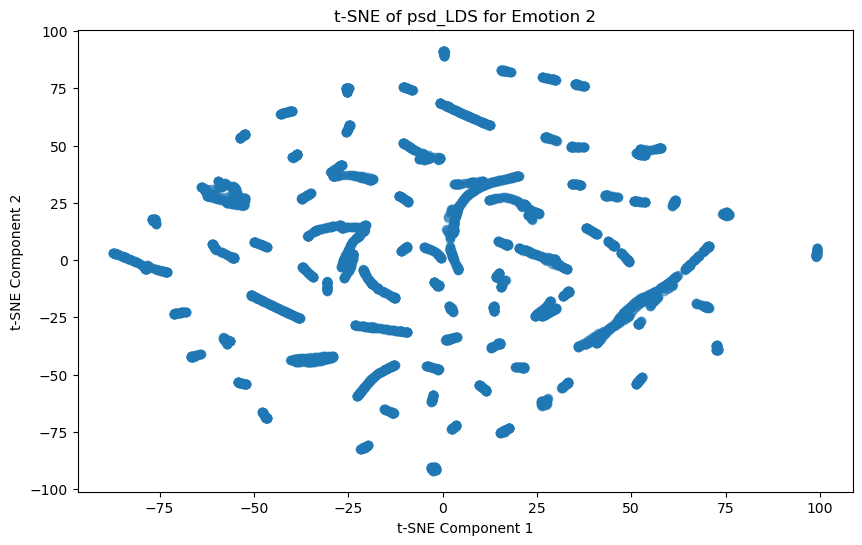

c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\waye2\anaconda3\envs\lakehead_bigdata\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


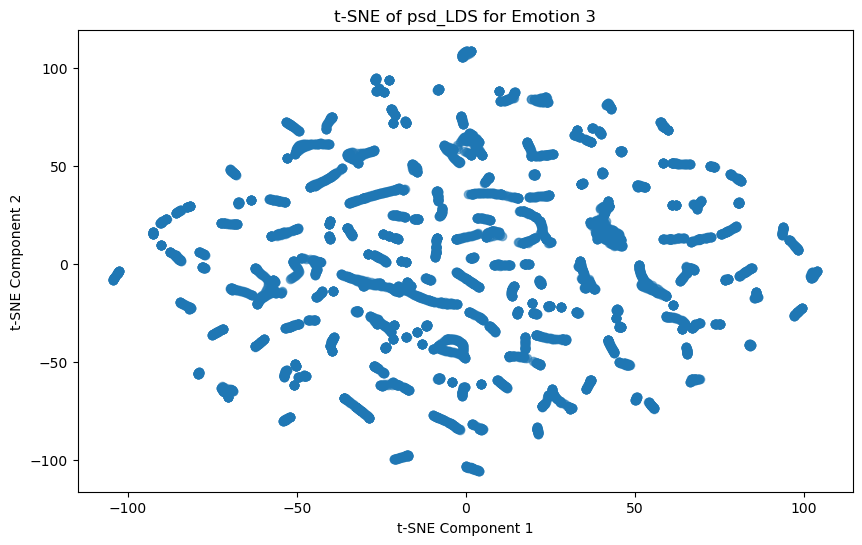

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1.3: Principal Component Analysis (PCA) for Dimensionality Reduction
for label in concatenated_de_lds_by_label:
    data = concatenated_de_lds_by_label[label].reshape(-1, concatenated_de_lds_by_label[label].shape[2])  # Flatten data across channels and time windows
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    plt.figure(figsize=(10, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    plt.title(f'PCA of de_LDS for Emotion {label}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

for label in concatenated_psd_lds_by_label:
    data = concatenated_psd_lds_by_label[label].reshape(-1, concatenated_psd_lds_by_label[label].shape[2])  # Flatten data across channels and time windows
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    plt.figure(figsize=(10, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    plt.title(f'PCA of psd_LDS for Emotion {label}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Step 1.4: t-SNE Visualization for Dimensionality Reduction and Clustering
for label in concatenated_de_lds_by_label:
    data = concatenated_de_lds_by_label[label].reshape(-1, concatenated_de_lds_by_label[label].shape[2])  # Flatten data across channels and time windows
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_result = tsne.fit_transform(data)

    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
    plt.title(f't-SNE of de_LDS for Emotion {label}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

for label in concatenated_psd_lds_by_label:
    data = concatenated_psd_lds_by_label[label].reshape(-1, concatenated_psd_lds_by_label[label].shape[2])  # Flatten data across channels and time windows
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_result = tsne.fit_transform(data)

    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
    plt.title(f't-SNE of psd_LDS for Emotion {label}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# 0, 1, 2, and 3 denote the ground truth, neutral, sad, fear, and happy emotions

**In summary**:  
The code loads EEG-derived features (DE_LDS and PSD_LDS), groups them by emotion labels, and performs comprehensive exploratory data analysis. It examines variability, computes correlations, and uses PCA and t-SNE to visualize how the EEG features differ or group by emotion. This provides insights into the underlying structure and relationships of EEG signals under different emotional conditions.
1. **Variance and Standard Deviation:**  
   - DE features showed higher variance and complexity for `happy` and `fear`, while `neutral` had more stable signals. PSD features had less variance differentiation, with `fear` and `sad` showing more variability.

2. **Correlation Analysis:**  
   - DE features had strong `alpha`-`beta` correlations for `fear` and `happy`, while PSD features showed `theta`-`alpha` correlations for `neutral` and `sad`, indicating shared band features.

3. **PCA Insights:**  
   - DE features formed distinct clusters for `happy` and `fear`, while `sad` and `neutral` overlapped. PSD features exhibited less distinct clustering, especially for `neutral` and `sad`.

4. **t-SNE Clustering:**  
   - DE features separated `happy` and `fear` well, with significant overlap for `neutral` and `sad`. PSD features showed more overlap overall, making differentiation challenging.

5. **Overall Observations:**  
   - DE features outperformed PSD in emotion differentiation, especially for `happy` and `fear`, while `neutral` and `sad` remained harder to distinguish.

# Augmentation and Curation


## Normalization , Outlier Detection and Handling for eeg_feature_smooth


Original Data Summary for de_LDS:
de_LDS20 (sad): mean = 21.608445206298896, std = 2.073889384824417
de_LDS11 (fear): mean = 21.5232426539023, std = 2.0816698875377346
de_LDS14 (happy): mean = 22.09273176107869, std = 2.170747171165611
de_LDS23 (neutral): mean = 21.883253669940007, std = 2.2799689644266516

Original Data Summary for psd_LDS:
psd_LDS20 (sad): mean = 104244.43428767913, std = 196696.79162777442
psd_LDS11 (fear): mean = 91691.37803879939, std = 181999.49745028227
psd_LDS14 (happy): mean = 225502.53306753753, std = 602830.454785294
psd_LDS23 (neutral): mean = 190936.20107817868, std = 471030.3001772851


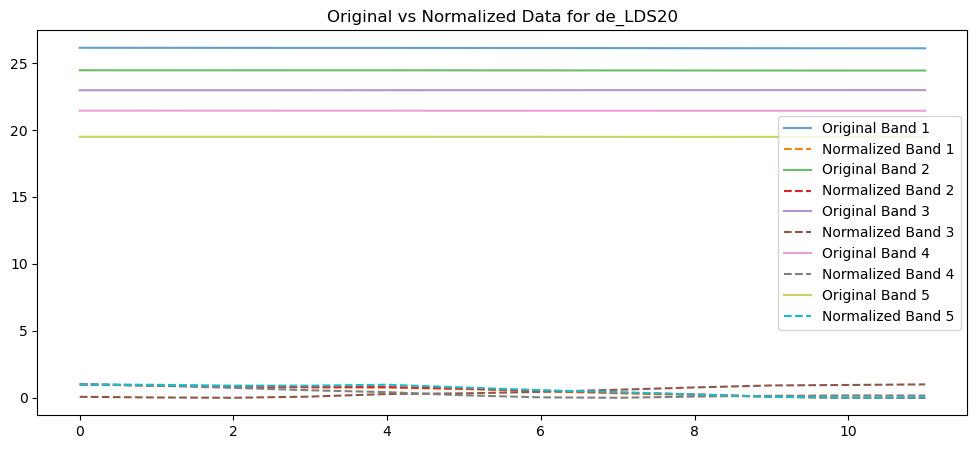

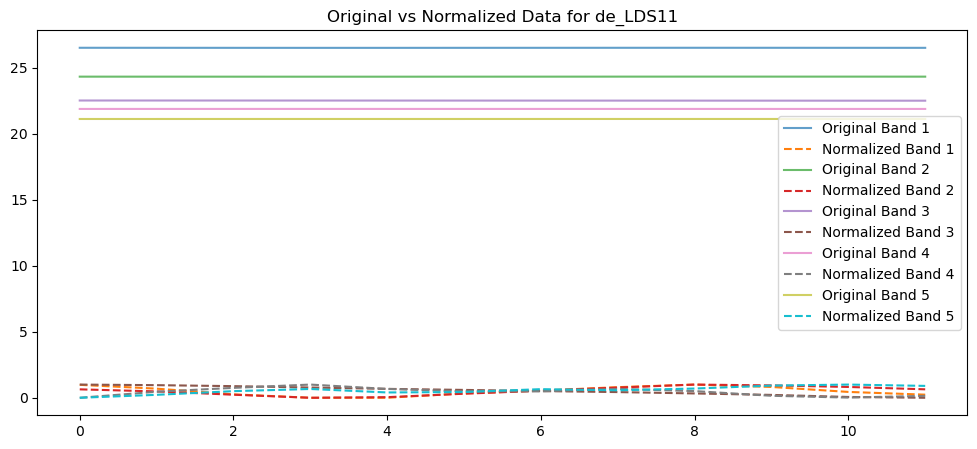

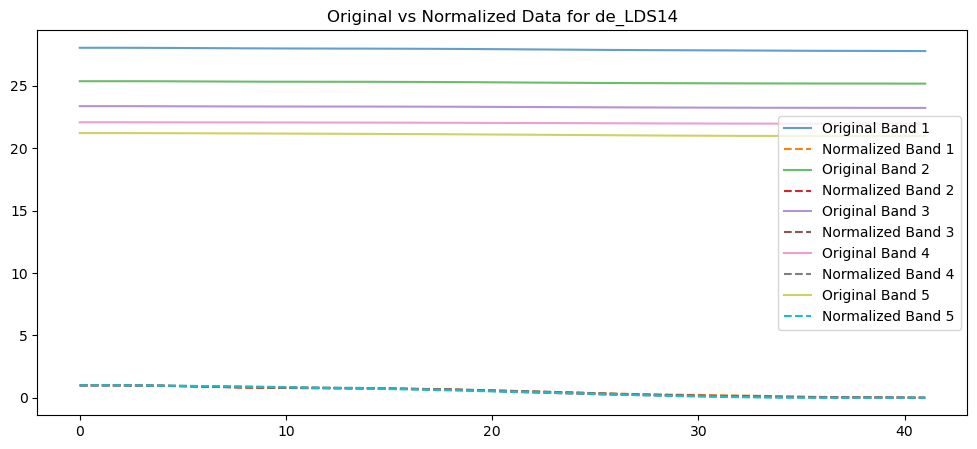

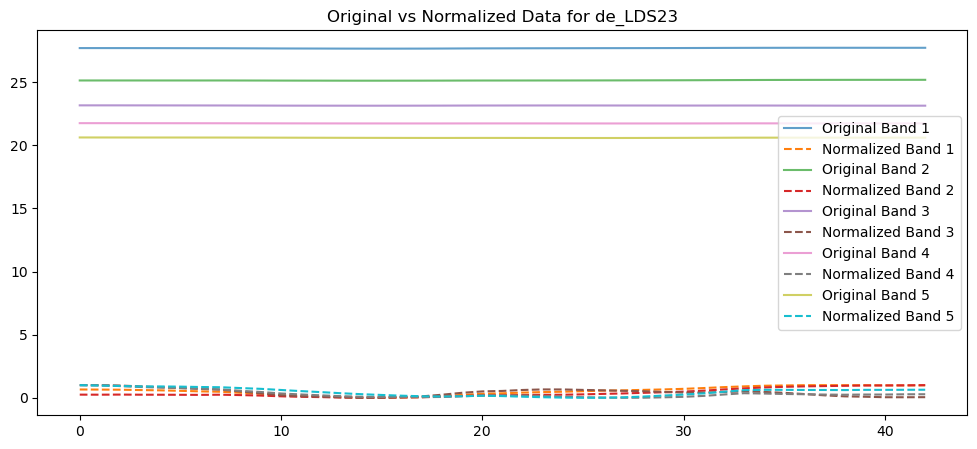


Normalized Data Summary for de_LDS:
de_LDS20 (sad): mean = 0.46151275305547207, std = 0.3524577129874996
de_LDS11 (fear): mean = 0.5100285143474032, std = 0.3525731421396445
de_LDS14 (happy): mean = 0.4961154633337063, std = 0.337140387300313
de_LDS23 (neutral): mean = 0.4637030708460217, std = 0.32937733433477084

Normalized Data Summary for psd_LDS:
psd_LDS20 (sad): mean = 0.46036075705064894, std = 0.3549341724185012
psd_LDS11 (fear): mean = 0.48987779338859605, std = 0.3527481035573661
psd_LDS14 (happy): mean = 0.46773017804262335, std = 0.3342199399606711
psd_LDS23 (neutral): mean = 0.4295891555835544, std = 0.34229738352808026

Outlier Handling Summary for de_LDS:
de_LDS20: original size = (62, 12, 5), cleaned size = (62, 12, 5)


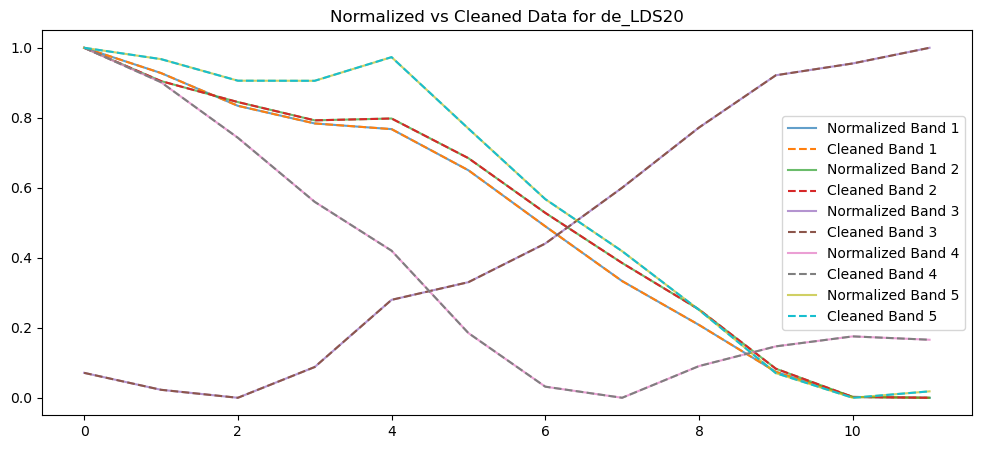

de_LDS11: original size = (62, 12, 5), cleaned size = (62, 12, 5)


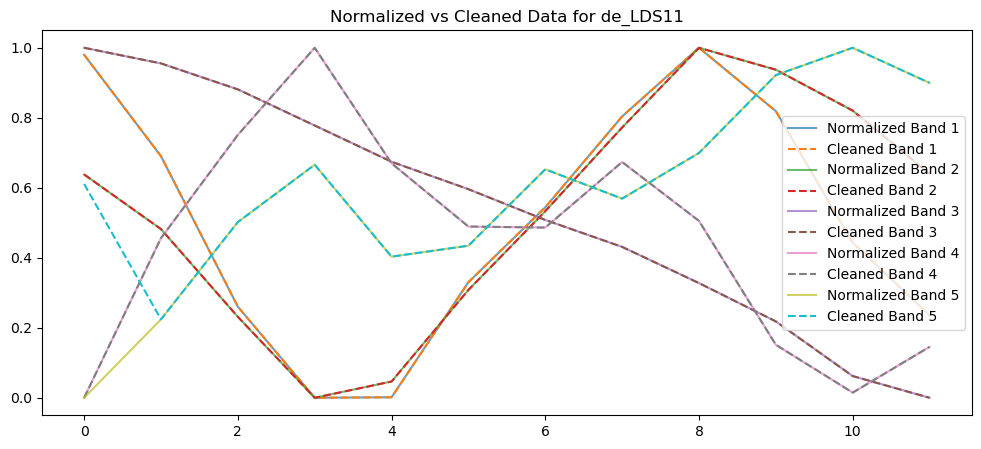

de_LDS14: original size = (62, 42, 5), cleaned size = (62, 42, 5)


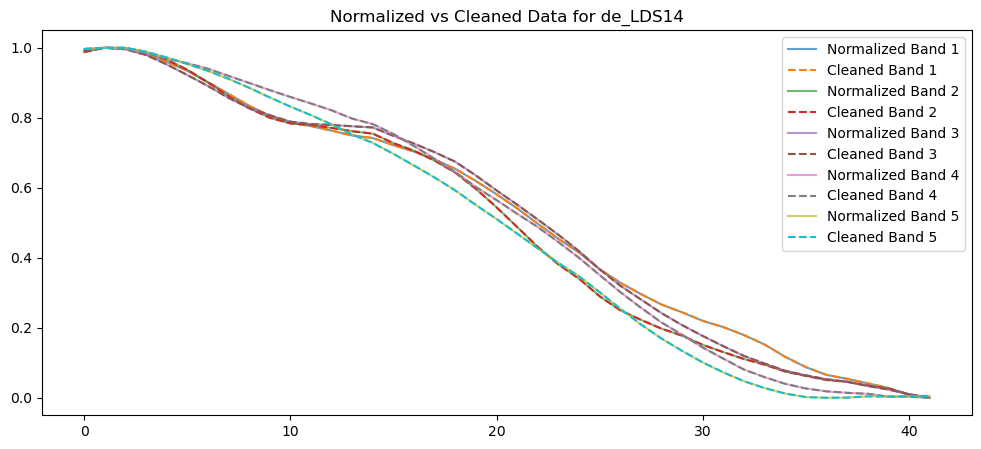

de_LDS23: original size = (62, 43, 5), cleaned size = (62, 43, 5)


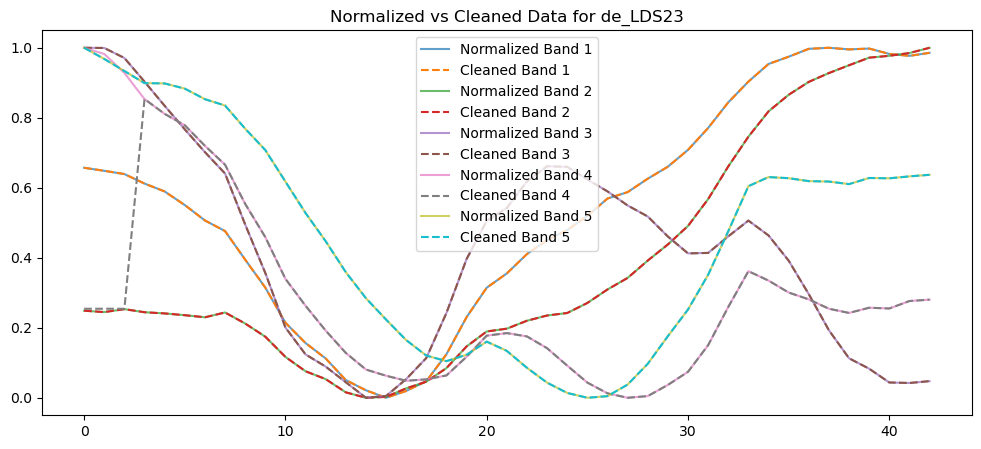


Outlier Handling Summary for psd_LDS:
psd_LDS20: original size = (62, 12, 5), cleaned size = (62, 12, 5)


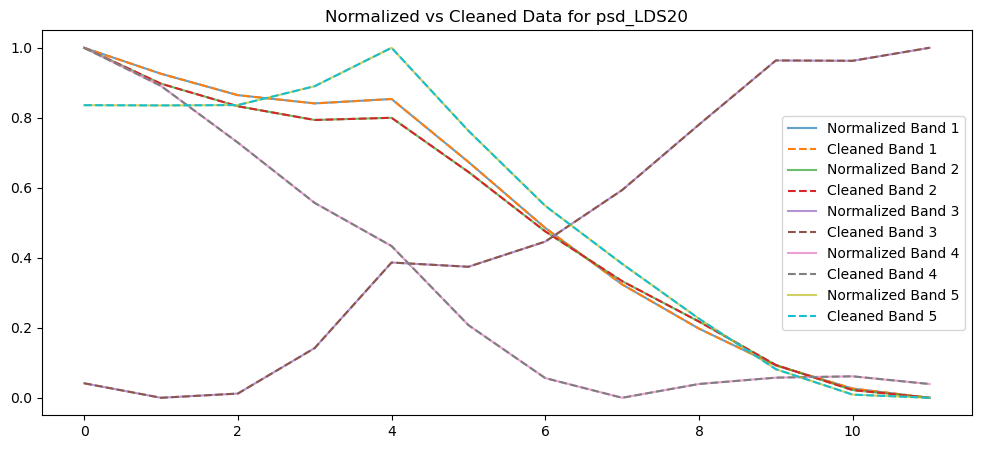

psd_LDS11: original size = (62, 12, 5), cleaned size = (62, 12, 5)


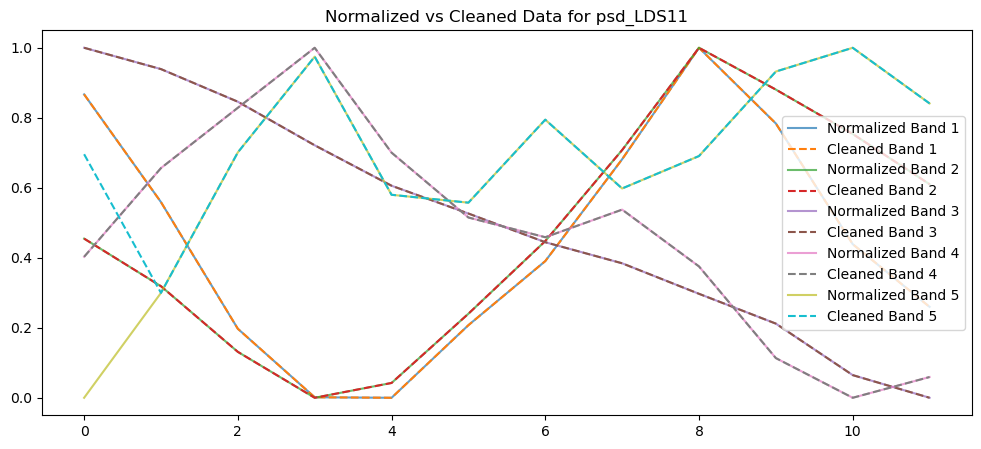

psd_LDS14: original size = (62, 42, 5), cleaned size = (62, 42, 5)


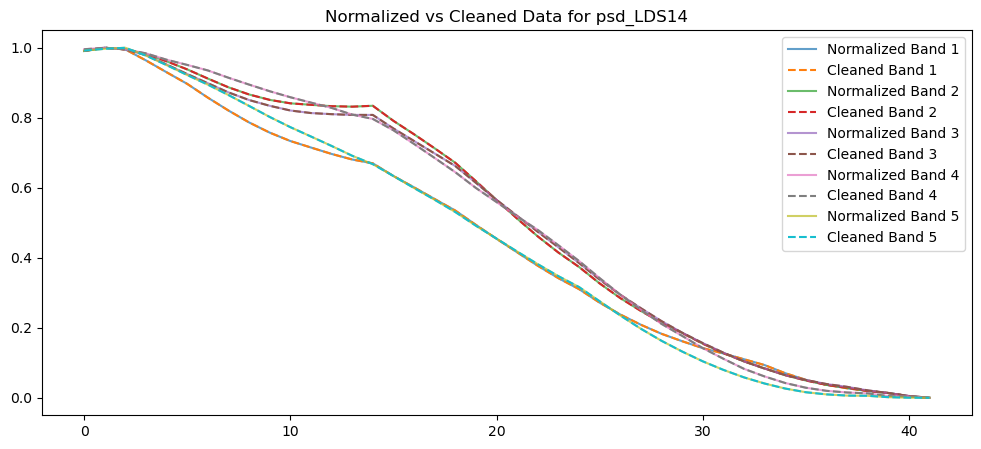

psd_LDS23: original size = (62, 43, 5), cleaned size = (62, 43, 5)


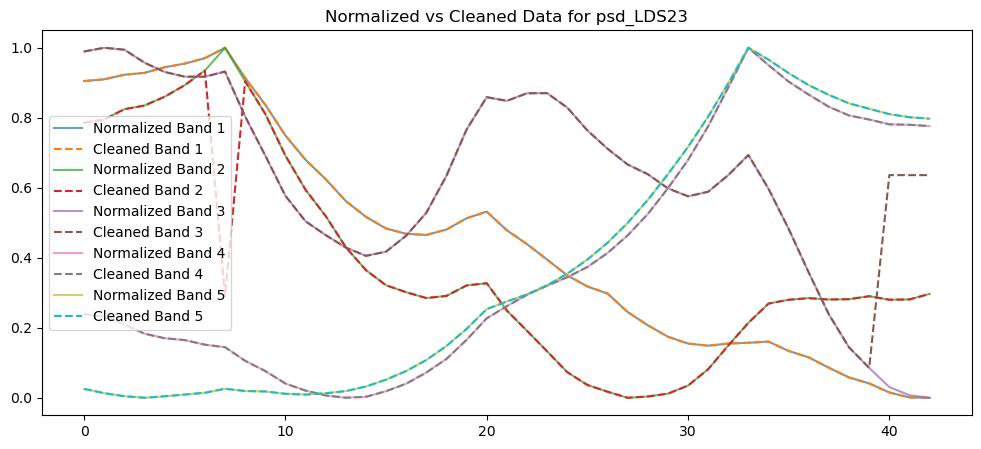

In [10]:
import os
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

# Load the .mat file (example path)
file_path = 'D:/BigData/SEED_IV/SEED_IV/eeg_feature_smooth/1/1_20160518.mat'
mat_data = sio.loadmat(file_path)

# Define session labels for emotions
session_labels = [1, 2, 3, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 3, 2, 2, 3, 3, 0, 3, 0, 3]

# Selected trials for Step 2
selected_trials_de = ['de_LDS20', 'de_LDS11', 'de_LDS14', 'de_LDS23']
selected_trials_psd = ['psd_LDS20', 'psd_LDS11', 'psd_LDS14', 'psd_LDS23']

# Emotion labels mapping
emotion_mapping = {0: 'neutral', 1: 'sad', 2: 'fear', 3: 'happy'}

# Step 2.1: Normalization
scaler = MinMaxScaler()
normalized_data_de = {}
normalized_data_psd = {}

print("\nOriginal Data Summary for de_LDS:")
for trial in selected_trials_de:
    data = mat_data[trial]
    emotion_label = session_labels[selected_trials_de.index(trial)]
    emotion = emotion_mapping[emotion_label]
    print(f"{trial} ({emotion}): mean = {np.mean(data)}, std = {np.std(data)}")  # Print original data statistics

    channels, time_windows, bands = data.shape
    normalized_data_de[trial] = np.zeros_like(data)
    for ch in range(channels):
        for band in range(bands):
            normalized_data_de[trial][ch, :, band] = scaler.fit_transform(data[ch, :, band].reshape(-1, 1)).flatten()

print("\nOriginal Data Summary for psd_LDS:")
for trial in selected_trials_psd:
    data = mat_data[trial]
    emotion_label = session_labels[selected_trials_psd.index(trial)]
    emotion = emotion_mapping[emotion_label]
    print(f"{trial} ({emotion}): mean = {np.mean(data)}, std = {np.std(data)}")  # Print original data statistics

    channels, time_windows, bands = data.shape
    normalized_data_psd[trial] = np.zeros_like(data)
    for ch in range(channels):
        for band in range(bands):
            normalized_data_psd[trial][ch, :, band] = scaler.fit_transform(data[ch, :, band].reshape(-1, 1)).flatten()

# Plot comparison of original vs normalized data for de_LDS (all bands)
for trial in selected_trials_de:
    data = mat_data[trial]
    normalized_data = normalized_data_de[trial]
    plt.figure(figsize=(12, 5))
    for band in range(5):
        plt.plot(data[0, :, band], label=f'Original Band {band + 1}', alpha=0.7)
        plt.plot(normalized_data[0, :, band], label=f'Normalized Band {band + 1}', linestyle='--')
    plt.title(f"Original vs Normalized Data for {trial}")
    plt.legend()
    plt.show()

print("\nNormalized Data Summary for de_LDS:")
for trial, data in normalized_data_de.items():
    emotion_label = session_labels[selected_trials_de.index(trial)]
    emotion = emotion_mapping[emotion_label]
    print(f"{trial} ({emotion}): mean = {np.mean(data)}, std = {np.std(data)}")  # Print normalized data statistics

print("\nNormalized Data Summary for psd_LDS:")
for trial, data in normalized_data_psd.items():
    emotion_label = session_labels[selected_trials_psd.index(trial)]
    emotion = emotion_mapping[emotion_label]
    print(f"{trial} ({emotion}): mean = {np.mean(data)}, std = {np.std(data)}")  # Print normalized data statistics

# Step 2.2: Outlier Detection and Handling

def handle_outliers(data, z_threshold=2.0):
    channels, time_windows, bands = data.shape
    cleaned_data = np.copy(data)
    for ch in range(channels):
        for band in range(bands):
            z_scores = np.abs(zscore(data[ch, :, band]))
            outliers = z_scores > z_threshold
            cleaned_data[ch, outliers, band] = np.median(data[ch, :, band])  # Replace outliers with median
    return cleaned_data

cleaned_data_de = {}
cleaned_data_psd = {}

print("\nOutlier Handling Summary for de_LDS:")
for trial, data in normalized_data_de.items():
    cleaned_data_de[trial] = handle_outliers(data)
    print(f"{trial}: original size = {data.shape}, cleaned size = {cleaned_data_de[trial].shape}")  # Compare data sizes

    # Plot comparison of normalized vs cleaned data for de_LDS (all bands)
    plt.figure(figsize=(12, 5))
    for band in range(5):
        plt.plot(data[0, :, band], label=f'Normalized Band {band + 1}', alpha=0.7)
        plt.plot(cleaned_data_de[trial][0, :, band], label=f'Cleaned Band {band + 1}', linestyle='--')
    plt.title(f"Normalized vs Cleaned Data for {trial}")
    plt.legend()
    plt.show()

print("\nOutlier Handling Summary for psd_LDS:")
for trial, data in normalized_data_psd.items():
    cleaned_data_psd[trial] = handle_outliers(data)
    print(f"{trial}: original size = {data.shape}, cleaned size = {cleaned_data_psd[trial].shape}")  # Compare data sizes

    # Plot comparison of normalized vs cleaned data for psd_LDS (all bands)
    plt.figure(figsize=(12, 5))
    for band in range(5):
        plt.plot(data[0, :, band], label=f'Normalized Band {band + 1}', alpha=0.7)
        plt.plot(cleaned_data_psd[trial][0, :, band], label=f'Cleaned Band {band + 1}', linestyle='--')
    plt.title(f"Normalized vs Cleaned Data for {trial}")
    plt.legend()
    plt.show()



# Saving cleaned data for further use
output_directory = 'D:/BigData/SEED_IV/SEED_IV/eeg_feature_smooth/cleaned_data'
os.makedirs(output_directory, exist_ok=True)

for trial, cleaned_data in cleaned_data_de.items():
    sio.savemat(os.path.join(output_directory, f'{trial}_cleaned.mat'), {trial: cleaned_data})

for trial, cleaned_data in cleaned_data_psd.items():
    sio.savemat(os.path.join(output_directory, f'{trial}_cleaned.mat'), {trial: cleaned_data})

## Synthetic Data Creation with add_gaussian_noise

In [11]:
import os
import numpy as np
import scipy.io as sio

# Load cleaned data from Step 2
cleaned_data_directory = 'D:/BigData/SEED_IV/SEED_IV/eeg_feature_smooth/cleaned_data'
cleaned_data_de = {}
cleaned_data_psd = {}

for trial in selected_trials_de:
    cleaned_data_de[trial] = sio.loadmat(os.path.join(cleaned_data_directory, f'{trial}_cleaned.mat'))[trial]

for trial in selected_trials_psd:
    cleaned_data_psd[trial] = sio.loadmat(os.path.join(cleaned_data_directory, f'{trial}_cleaned.mat'))[trial]

# Synthetic Data Creation

def add_gaussian_noise(data, sigma=0.05):
    return data + np.random.normal(0, sigma, data.shape)

synthetic_data_de = {}
synthetic_data_psd = {}

print("\nSynthetic Data Creation for de_LDS:")
for trial, data in cleaned_data_de.items():
    synthetic_data_de[trial] = add_gaussian_noise(data)
    print(f"{trial}: synthetic data mean = {np.mean(synthetic_data_de[trial])}, std = {np.std(synthetic_data_de[trial])}")

print("\nSynthetic Data Creation for psd_LDS:")
for trial, data in cleaned_data_psd.items():
    synthetic_data_psd[trial] = add_gaussian_noise(data)
    print(f"{trial}: synthetic data mean = {np.mean(synthetic_data_psd[trial])}, std = {np.std(synthetic_data_psd[trial])}")


# Saving synthetic data for further use
output_directory = 'D:/BigData/SEED_IV/SEED_IV/eeg_feature_smooth/synthetic_data'
os.makedirs(output_directory, exist_ok=True)

for trial, synthetic_data in synthetic_data_de.items():
    sio.savemat(os.path.join(output_directory, f'{trial}_synthetic.mat'), {trial: synthetic_data})

for trial, synthetic_data in synthetic_data_psd.items():
    sio.savemat(os.path.join(output_directory, f'{trial}_synthetic.mat'), {trial: synthetic_data})




Synthetic Data Creation for de_LDS:
de_LDS20: synthetic data mean = 0.4554793165518363, std = 0.35359608639224543
de_LDS11: synthetic data mean = 0.5104090210023879, std = 0.3501565098655178
de_LDS14: synthetic data mean = 0.49585181202625433, std = 0.33917539458290646
de_LDS23: synthetic data mean = 0.46030398037086656, std = 0.32909193164514544

Synthetic Data Creation for psd_LDS:
psd_LDS20: synthetic data mean = 0.4535283099299592, std = 0.35487153377797565
psd_LDS11: synthetic data mean = 0.48539532264485247, std = 0.35104951993363914
psd_LDS14: synthetic data mean = 0.46436537114994514, std = 0.33489042598503144
psd_LDS23: synthetic data mean = 0.4259244133413503, std = 0.34311590231542055


## Outlier Detection and Handling for eeg_raw_data (Method finally used on our model)

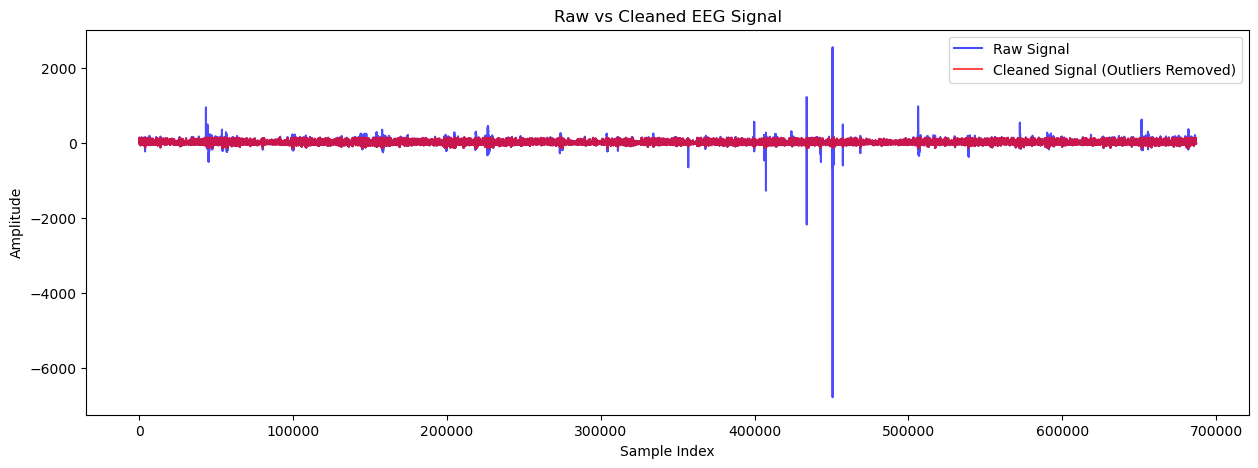

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Function to remove outliers from a signal
def remove_outliers(signal, method='zscore', threshold=3):
    if method == 'zscore':
        mean = np.mean(signal)
        std = np.std(signal)
        z_scores = np.abs((signal - mean) / std)
        mask = z_scores < threshold
        signal_clean = signal.copy()
        # Replace outliers with interpolated values
        indices = np.arange(len(signal))
        signal_clean[~mask] = np.interp(indices[~mask], indices[mask], signal_clean[mask])
    elif method == 'mad':
        median = np.median(signal)
        mad = np.median(np.abs(signal - median))
        mask = np.abs(signal - median) < threshold * mad
        signal_clean = signal.copy()
        indices = np.arange(len(signal))
        signal_clean[~mask] = np.interp(indices[~mask], indices[mask], signal_clean[mask])
    else:
        raise ValueError("Method not recognized.")
    return signal_clean

# Function to perform EDA on raw and processed data
def perform_eda(filepath):
    # Load EEG data
    eeg_data = loadmat(filepath)
    subject_names = sorted([key for key in eeg_data.keys() if key.startswith('cz_eeg')])

    # Concatenate all data
    all_data = []
    for subject_name in subject_names:
        raw_data = eeg_data[subject_name]
        all_data.append(raw_data)

    concatenated_data = np.concatenate(all_data, axis=1)
    num_channels, num_samples = concatenated_data.shape

    # Process and visualize raw vs cleaned data
    raw_signal = concatenated_data[0]  # Use the first channel for visualization
    cleaned_signal = remove_outliers(raw_signal, method='zscore', threshold=3)

    plt.figure(figsize=(15, 5))
    plt.plot(raw_signal, label='Raw Signal', color='b', alpha=0.7)
    plt.plot(cleaned_signal, label='Cleaned Signal (Outliers Removed)', color='r', alpha=0.7)
    plt.title('Raw vs Cleaned EEG Signal')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Example usage
filepath = 'D:/BigData/SEED_IV/SEED_IV/eeg_raw_data/1/1_20160518.mat'  # Replace with your file path
perform_eda(filepath)


